<a href="https://colab.research.google.com/github/Naufall1/PCVK_Ganjil_2024/blob/main/PCVK_Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : Muhammad Naufal Kurniawan ✅ <br>
Kelas : TI-3C [18] <br>
NIM   : 2241720214 <br>

# Tugas Praktikum

## Langkah 1

In [2]:
from google.colab import drive

drive.mount('/content/drive1')

Mounted at /content/drive1


## Langkah 2


In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

## Langkah 3


In [4]:
from pprint import pprint
image = cv.imread('/content/drive1/MyDrive/Colab Notebooks/PCVK/images/lena/lena.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
hist_r = {}
hist_g = {}
hist_b = {}

hist = {
    'r': hist_r,
    'g': hist_g,
    'b': hist_b
}

for k, v in hist.items():
  for i in range(256):
    v[i] = 0

def calcHist(channel):
  height = channel.shape[0]
  width = channel.shape[1]

  for y in range(height):
      for x in range(width):
        r,g,b = channel[y, x]

        hist['r'][r] += 1
        hist['g'][g] += 1
        hist['b'][b] += 1

calcHist(image)
# pprint(hist)

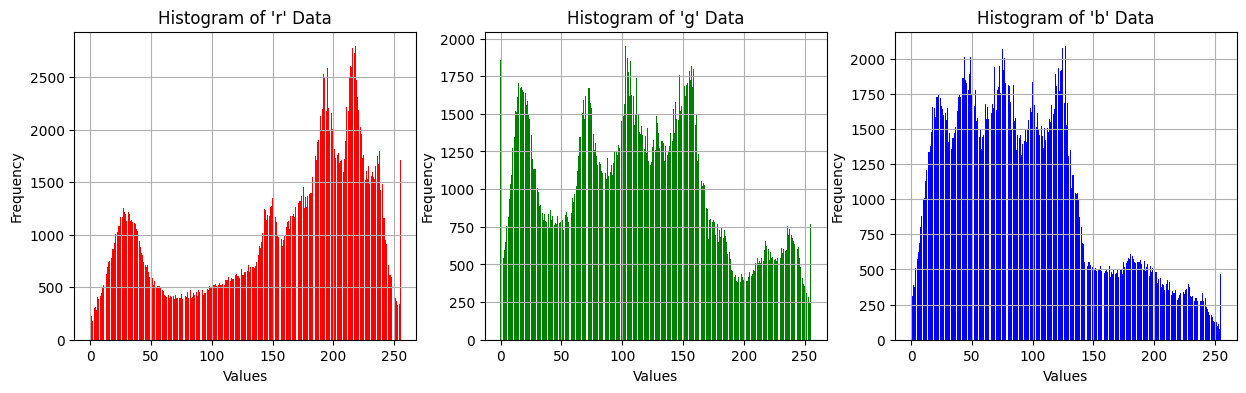

In [5]:
idx = 0
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

def plot(channel):
    global idx, axs
    d = hist[channel]
    # Plot as a histogram
    axs[idx].bar(list(d.keys()), list(d.values()), color=channel)
    axs[idx].set_title(f"Histogram of '{channel}' Data")
    axs[idx].set_xlabel("Values")
    axs[idx].set_ylabel("Frequency")
    axs[idx].grid(True)
    idx += 1

plot('r')
plot('g')
plot('b')

## Langkah 4

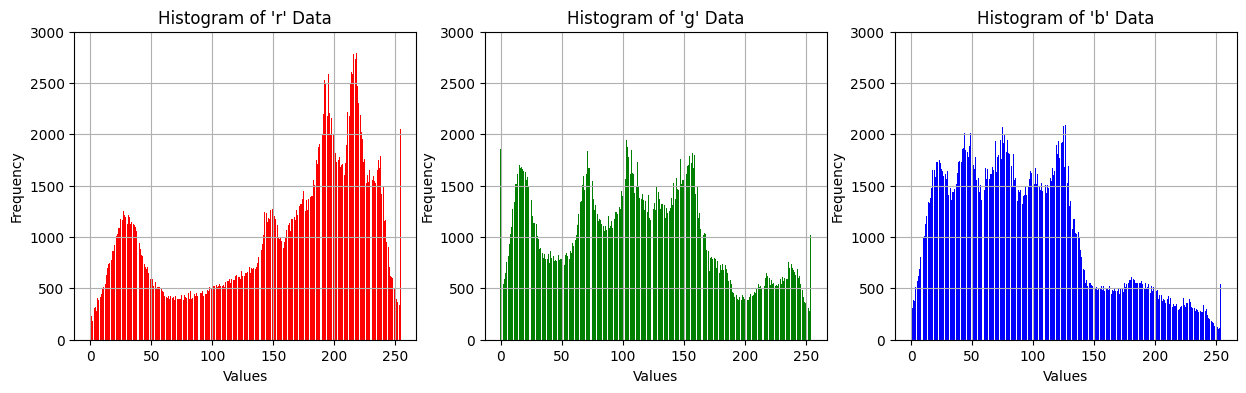

In [6]:
import array

image = cv.imread('/content/drive1/MyDrive/Colab Notebooks/PCVK/images/lena/lena.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

def getHist(data: array):
  return np.histogram(data, bins=255)

# pprint(hist)

idx = 0
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
def plot(data):
    colors = ['r', 'g', 'b']
    global idx, axs
    axs[idx].bar([i for i in range(255)], data[0], color=colors[idx])
    axs[idx].set_title(f"Histogram of '{colors[idx]}' Data")
    axs[idx].set_xlabel("Values")
    axs[idx].set_ylabel("Frequency")
    axs[idx].set_ylim(0, 3000)
    axs[idx].grid(True)
    idx += 1

for i in range(3):
  data = image[:,:,i]
  hist = getHist(data)
  plot(hist)

## Langkah 5

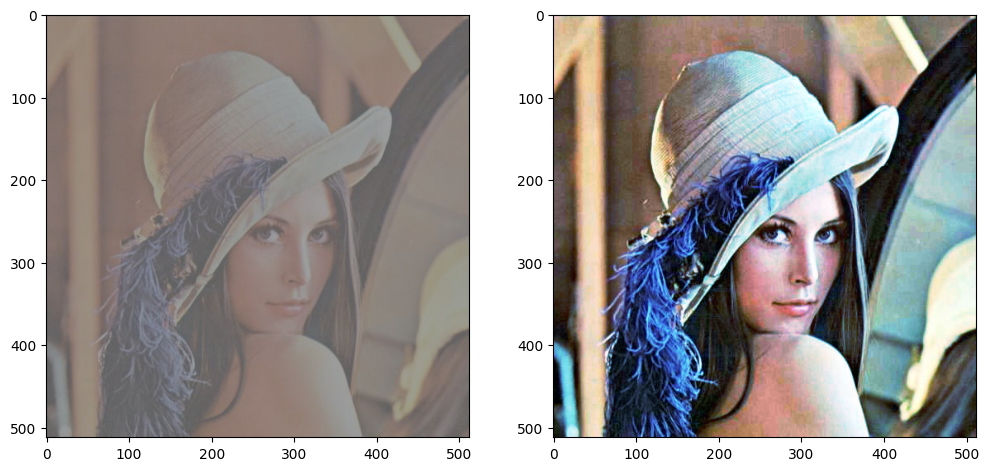

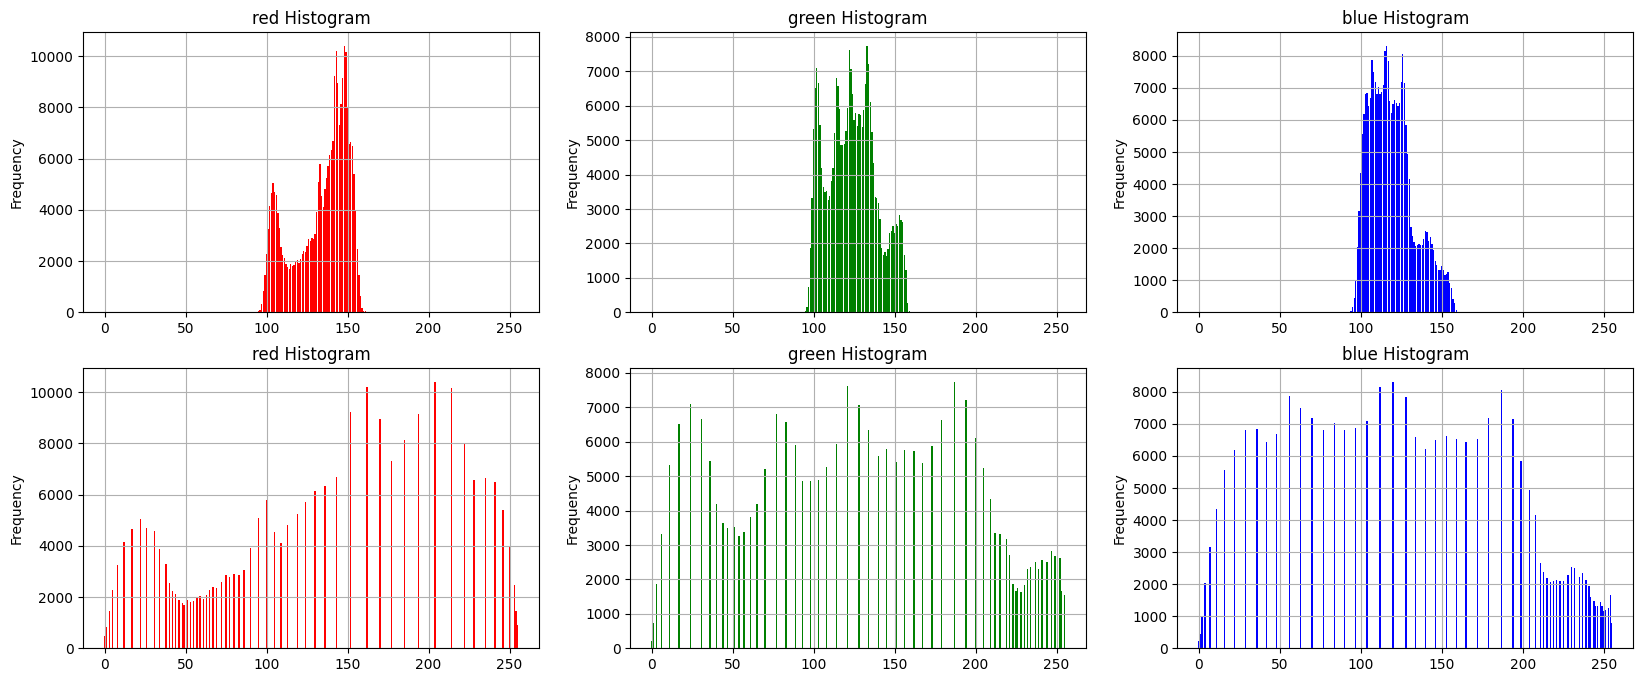

In [7]:
image = cv.imread('/content/drive1/MyDrive/Colab Notebooks/PCVK/images/lena/lena_lc.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

img_fig, img_axs = plt.subplots(1, 2, figsize=(12, 6))
img_axs[0].imshow(image)

def calcHistImg(data: array) -> tuple:
  bin_edges = [i for i in range(256)]
  hr = [0 for i in range(256)]
  hg = [0 for i in range(256)]
  hb = [0 for i in range(256)]

  height = data.shape[0]
  width = data.shape[1]

  for y in range(height):
      for x in range(width):
        r,g,b = data[y, x]
        # print(r,g,b)
        hr[r] += 1
        hg[g] += 1
        hb[b] += 1

  return (bin_edges, hr, hg, hb)

def equalizeHist_manual(channel) -> array:
  channel = np.array(channel, dtype=np.uint8)

  # Langkah 1 : Buat histogram
  hist, bins = np.histogram(channel, bins=256, range=[0, 256])

  # Langkah 2: Hitung PDF (Normalized Histogram)
  pdf = hist / sum(hist)

  # Langkah 3: Hitung CDF (Cumulative Distribution Function)
  cdf = np.cumsum(pdf)

  # Langkah 4: Transformasi Histogram Equalization
  # Formula: s_k = (L - 1) * CDF(r_k)
  L = 256  # jumlah level intensitas untuk gambar 8-bit
  equalized_channel = np.round(cdf[channel] * (L - 1)).astype(np.uint8)

  # equalized_image = cv.merge(equalized_channels)

  return equalized_channel

def equalizeHists_manual(src_image) -> array:
  channels = cv.split(src_image)

  equalized_channels = [equalizeHist_manual(channel) for channel in channels]
  equalized_image = cv.merge(equalized_channels)

  return equalized_image

# fig, axs = plt.subplots(2, 3, figsize=(20, 7))
plt.figure(figsize=(20, 8))
idx = 1
def plot(data, row, color):
    colors = ['r', 'g', 'b']
    global idx, axs
    plt.subplot(2, 3, idx)
    plt.bar(data[1], data[0], color=color)
    plt.title(f'{color} Histogram')
    # plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True)
    idx += 1

bin_edges, r, g, b = calcHistImg(image)
plot((r, bin_edges), row=0, color='red')
plot((g, bin_edges), row=0, color='green')
plot((b, bin_edges), row=0, color='blue')

equ_image = equalizeHists_manual(image)
img_axs[1].imshow(equ_image)

bin_edges, r, g, b = calcHistImg(equ_image)
plot((r, bin_edges), row=1, color='red')
plot((g, bin_edges), row=1, color='green')
plot((b, bin_edges), row=1, color='blue')


## Langkah 6

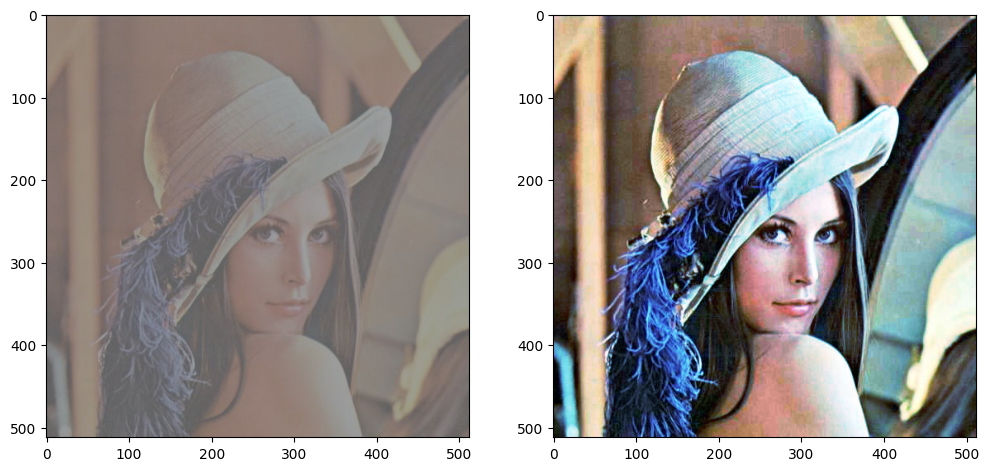

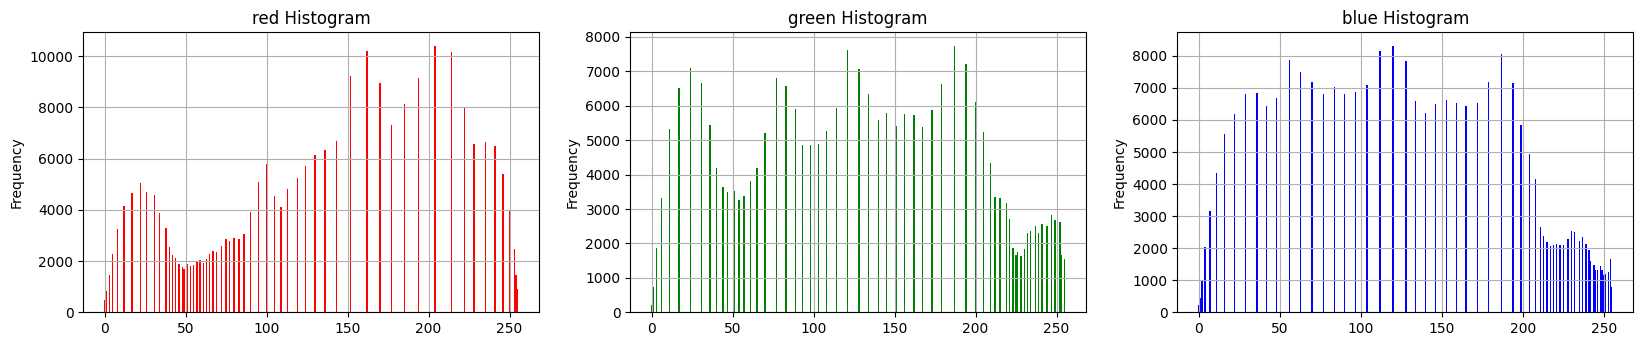

In [8]:
image = cv.imread('/content/drive1/MyDrive/Colab Notebooks/PCVK/images/lena/lena_lc.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

img_fig, img_axs = plt.subplots(1, 2, figsize=(12, 6))
img_axs[0].imshow(image)

plt.figure(figsize=(20, 8))
idx = 1
def plot(data, row, color):
    colors = ['r', 'g', 'b']
    global idx, axs
    plt.subplot(2, 3, idx)
    plt.bar(data[1], data[0], color=color)
    plt.title(f'{color} Histogram')
    # plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True)
    idx += 1

def equalizeHist(src_image):
  channels = cv.split(src_image)
  equalized_channels = [cv.equalizeHist(channel) for channel in channels]

  equalized_image = cv.merge(equalized_channels)

  return equalized_image

equ_image = equalizeHist(image)
img_axs[1].imshow(equ_image)

bin_edges, r, g, b = calcHistImg(equ_image)
plot((r, bin_edges), row=1, color='red')
plot((g, bin_edges), row=1, color='green')
plot((b, bin_edges), row=1, color='blue')

## Langkah 7

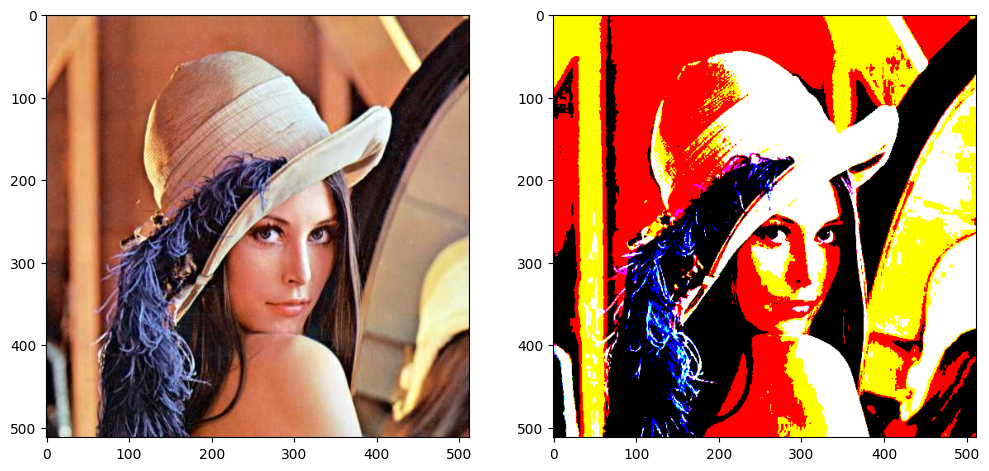

In [9]:
image = cv.imread('/content/drive1/MyDrive/Colab Notebooks/PCVK/images/lena/lena.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

img_fig, img_axs = plt.subplots(1, 2, figsize=(12, 6))
img_axs[0].imshow(image)

def newColor(color, factor):
  return np.round(factor * color / 255.0) * (255 / factor)

def error_diffusion(image: tuple|list, error: tuple|list, abc):
    R, G, B = image
    R = R + error[0] * abc
    G = G + error[1] * abc
    B = B + error[2] * abc
    return (R, G, B)


for y in range(image.shape[0]):
  for x in range(image.shape[1]):
    oldR, oldG, oldB = image[x,y]
    factor = 1

    newR = newColor(oldR, factor)
    newG = newColor(oldG, factor)
    newB = newColor(oldB, factor)

    image[x,y] = (newR, newG, newB)

img_axs[1].imshow(image)


## Langkah 8

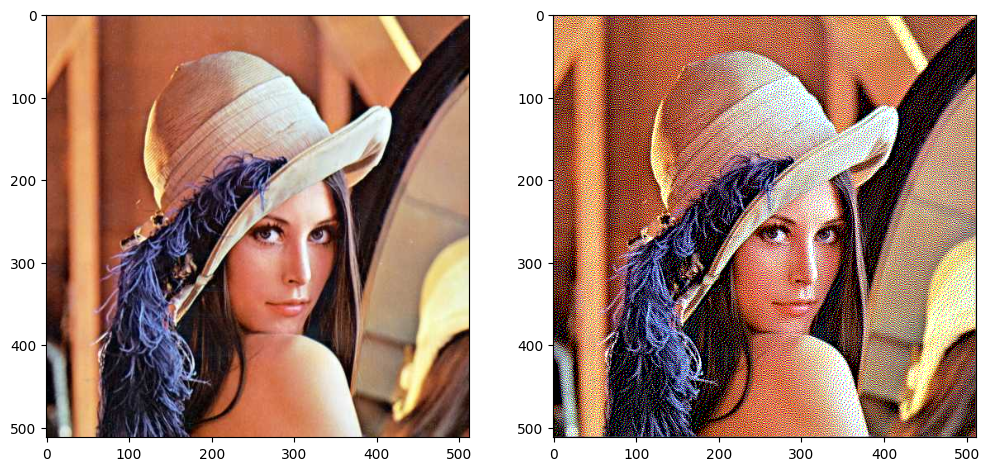

In [61]:
image = cv.imread('/content/drive1/MyDrive/Colab Notebooks/PCVK/images/lena/lena.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

img_fig, img_axs = plt.subplots(1, 2, figsize=(12, 6))
img_axs[0].imshow(image)

def newColor(color, factor):
  return np.round(factor * color / 255.0) * (255 / factor)

def error_diffusion(image: tuple|list, error: tuple|list, abc):
    R, G, B = image
    R = np.clip(R + error[0] * abc, 0, 255)
    G = np.clip(G + error[1] * abc, 0, 255)
    B = np.clip(B + error[2] * abc, 0, 255)
    return (R, G, B)


for y in range(image.shape[0]-1):
  for x in range(image.shape[1]-1):
    oldR, oldG, oldB = image[x,y]
    factor = 1

    newR = newColor(oldR, factor)
    newG = newColor(oldG, factor)
    newB = newColor(oldB, factor)

    image[x, y] = (int(newR), int(newG), int(newB))

    err_R = oldR - newR
    err_G = oldG - newG
    err_B = oldB - newB

    image[x+1, y  ] = error_diffusion(image[x+1, y  ], (err_R, err_G, err_B), 7/16)
    image[x-1, y+1] = error_diffusion(image[x-1, y+1], (err_R, err_G, err_B), 3/16)
    image[x  , y+1] = error_diffusion(image[x  , y+1], (err_R, err_G, err_B), 5/16)
    image[x+1, y+1] = error_diffusion(image[x+1, y+1], (err_R, err_G, err_B), 1/16)

img_axs[1].imshow(image)


## Langkah 9

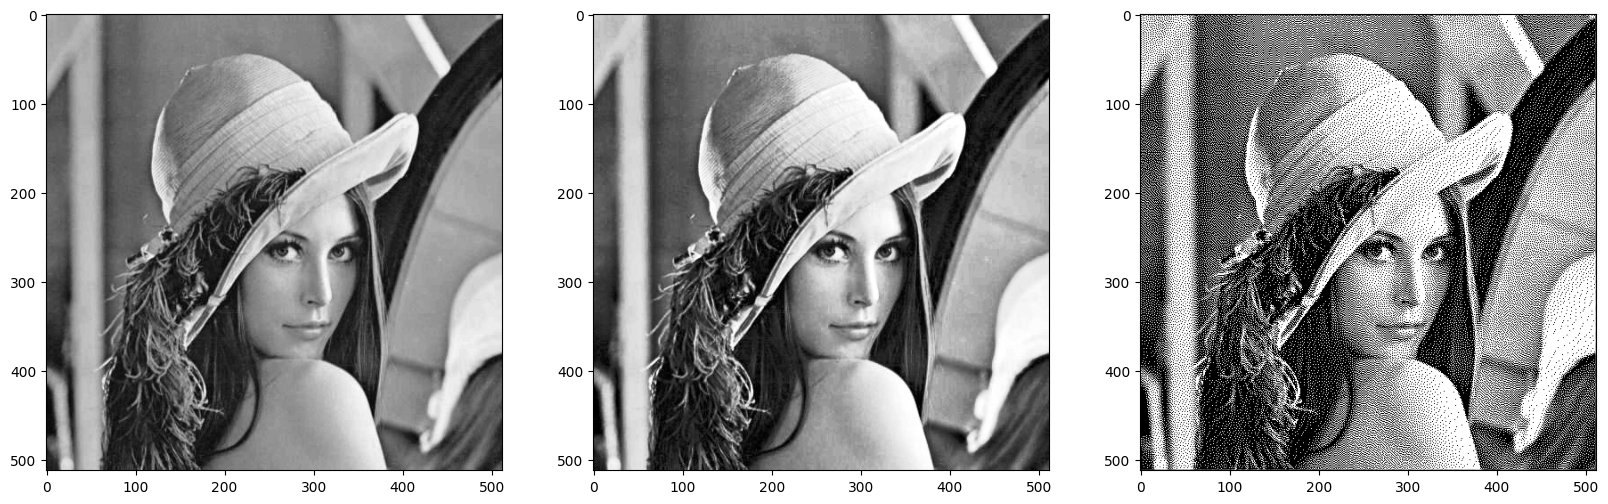

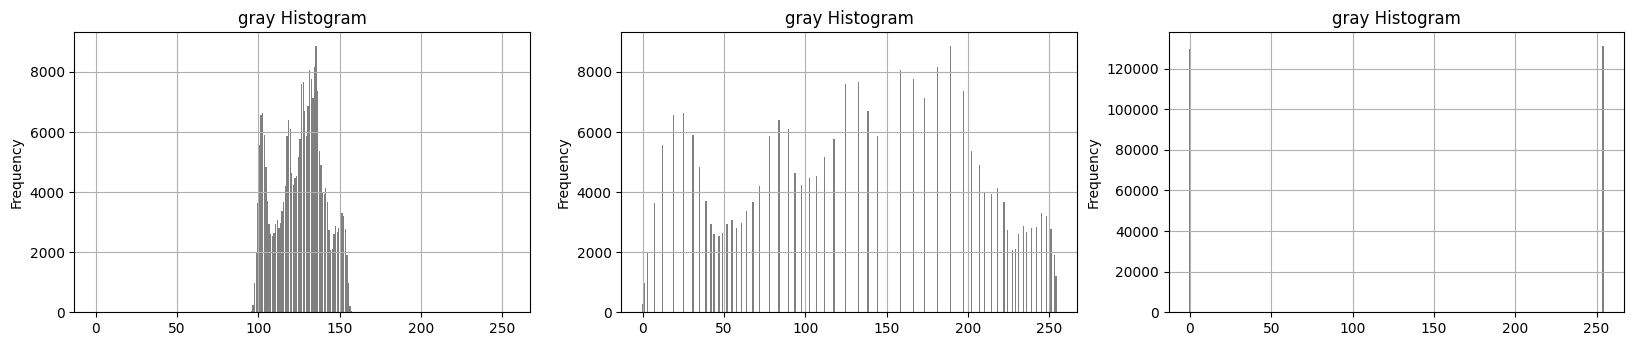

In [60]:
image = cv.imread('/content/drive1/MyDrive/Colab Notebooks/PCVK/images/lena/lena_lc.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

img_fig, img_axs = plt.subplots(1, 3, figsize=(20, 8))
img_axs[0].imshow(image, cmap='gray')

equalized_image = equalizeHist(image)
img_axs[1].imshow(equalized_image, cmap='gray')

image_hist = np.histogram(image, bins=256, range=[0, 255])
equalized_image_hist = np.histogram(equalized_image, bins=256, range=[0, 255])
plt.figure(figsize=(20, 8))
idx = 1
def plot(data, row, color):
    global idx, axs
    plt.subplot(2, 3, idx)
    plt.bar(data[1][:-1], data[0], color=color)
    plt.title(f'{color} Histogram')
    plt.ylabel('Frequency')
    plt.grid(True)
    idx += 1

plot(image_hist, 0, 'gray')
plot(equalized_image_hist, 0, 'gray')
# img_axs[1].imshow(image)

def error_diffusion(image: tuple|list, error: tuple|list, abc):
    C = image
    C = np.clip(C + error * abc, 0, 255)
    return C

for y in range(equalized_image.shape[0]-1):
  for x in range(equalized_image.shape[1]-1):
    old = equalized_image[x,y]
    factor = 1

    new = newColor(old, factor)

    equalized_image[x, y] = int(new)

    err = old - new

    equalized_image[x+1, y  ] = error_diffusion(equalized_image[x+1, y  ], (err), 7/16)
    equalized_image[x-1, y+1] = error_diffusion(equalized_image[x-1, y+1], (err), 3/16)
    equalized_image[x  , y+1] = error_diffusion(equalized_image[x  , y+1], (err), 5/16)
    equalized_image[x+1, y+1] = error_diffusion(equalized_image[x+1, y+1], (err), 1/16)


img_axs[2].imshow(equalized_image, cmap='gray')

equalized_image_hist = np.histogram(equalized_image, bins=256, range=[0, 255])
plot(equalized_image_hist, 0, 'gray')